In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 1000
n = 100
A = np.random.randn(m, n)
x_true = np.random.randn(n)
b = A @ x_true

In [3]:
x_naive = np.linalg.solve(A.T @ A, A.T @ b)

In [8]:
?np.linalg.norm

In [5]:
np.linalg.norm(x_naive - x_true), np.linalg.norm(A @ x_naive - b)

(7.260752315713656e-15, 2.1496966209548942e-13)

$$ \kappa (A) = \|A\| \|A^{-1}\| $$

$$ \kappa (A) = \frac{\sigma_{\max}}{\sigma_{\min}}$$

$$\|A\|_2 = \sigma_{\max}(A)$$ 

$$ \|A^{-1}\|_2 = \sigma_{\max}(A^{-1})$$

$$A = U\Sigma V^{\top}$$

- SVD for the $A^{-1}$
$$A^{-1} = V\Sigma^{-1}U^{\top}$$

- $\sigma_{\max}(A^{-1}) = \frac{1}{\sigma_{\min} (A}$

- $1 = \|I\| = \|AA^{-1}\| \leq \|A\| \|A^{-1}\| $

In [6]:
np.linalg.cond(A)

1.8775255552356893

In [7]:
s = np.linalg.svd(A, compute_uv=False)
print(s.max() / s.min())

1.8775255552356893


In [9]:
u, s, v = np.linalg.svd(A, compute_uv=True, full_matrices=False)


In [12]:
np.linalg.norm(A - (u * s[None, :]) @ v)

8.207632206268805e-13

In [38]:
s

array([4.13563836e+01, 4.10017466e+01, 4.08303130e+01, 4.00212907e+01,
       3.97955791e+01, 3.97350267e+01, 3.92937682e+01, 3.90975000e+01,
       3.89003497e+01, 3.86430529e+01, 3.84399132e+01, 3.80102570e+01,
       3.77548142e+01, 3.75536124e+01, 3.74886727e+01, 3.72745894e+01,
       3.70435791e+01, 3.66315480e+01, 3.64529128e+01, 3.61945618e+01,
       3.59987601e+01, 3.58665286e+01, 3.56707731e+01, 3.54575078e+01,
       3.53324050e+01, 3.51937906e+01, 3.50501685e+01, 3.47419040e+01,
       3.45654501e+01, 3.44405261e+01, 3.42809323e+01, 3.42081540e+01,
       3.39023644e+01, 3.38686281e+01, 3.36142541e+01, 3.33887086e+01,
       3.32840386e+01, 3.32352067e+01, 3.30765048e+01, 3.29974397e+01,
       3.28097744e+01, 3.24900985e+01, 3.23036437e+01, 3.21910139e+01,
       3.20598440e+01, 3.18632219e+01, 3.16813525e+01, 3.15695633e+01,
       3.14069668e+01, 3.13203292e+01, 3.11529331e+01, 3.10036601e+01,
       3.06213794e+01, 3.05310547e+01, 3.03994806e+01, 3.01639139e+01,
      

In [33]:
s[-1] = 1e-9
A_ill = (u * s[None, :]) @ v

In [34]:
np.linalg.cond(A_ill)

41356391281.6947

In [35]:
b = A_ill @ x_true

In [36]:
x_naive = np.linalg.solve(A_ill.T @ A_ill, A_ill.T @ b)

In [37]:
np.linalg.norm(x_naive - x_true), np.linalg.norm(A_ill @ x_naive - b)

(35.269149797981754, 3.526915134709015e-08)

In [42]:
x_lstsq = np.linalg.lstsq(A_ill, b, rcond=None)[0]
print(np.linalg.norm(A_ill @ x_lstsq - b))
print(np.linalg.norm(x_lstsq - x_true))

6.787385258024805e-13
3.9809513941648385e-05


- $ A = QR $, $Q$ is orthogonal, i.e. columns of $Q$ are orthonormal and $R$ is upper triangular


$$ A = U\Sigma V^{\top}$$



$A^{\top}A = R^{\top}Q^{\top}QR = R^{\top}R$

$A^{\top}b = R^{\top}Q^{\top}b$

$ R^{\top}Rx =  R^{\top}Q^{\top}b$

$ Rx = Q^{\top}b$ - solving costs $O(n^2)$

In [43]:
Q, R = np.linalg.qr(A_ill)

In [44]:
rhs = Q.T @ b
x_qr = np.linalg.solve(R, rhs)

In [45]:
print(np.linalg.norm(A_ill @ x_qr - b))
print(np.linalg.norm(x_qr - x_true))

2.146480988861119e-13
5.185482632851362e-06


In [47]:
R.diagonal()

array([-3.19693884e+01, -3.19356882e+01, -3.04703043e+01, -3.11805408e+01,
        3.21416506e+01,  3.14594391e+01, -3.05456742e+01,  3.08354920e+01,
        3.09912315e+01, -3.28773281e+01, -3.16548683e+01, -3.14212901e+01,
       -3.13973454e+01,  3.04088043e+01, -3.17693167e+01,  3.04840721e+01,
        3.08806090e+01, -3.09893526e+01, -3.09925397e+01, -3.00300168e+01,
       -3.08187351e+01, -3.04631827e+01,  3.12429354e+01,  3.10468434e+01,
        3.22264225e+01,  3.17750396e+01,  3.13133826e+01,  3.11239181e+01,
       -3.01222506e+01, -3.24964587e+01,  3.14417334e+01,  3.12125877e+01,
       -3.07973077e+01,  3.05133916e+01,  3.05811898e+01, -3.20959814e+01,
        3.24580489e+01, -3.24991619e+01, -3.20160279e+01, -3.08223775e+01,
       -3.07236940e+01, -3.15611508e+01, -3.12637033e+01, -3.19644432e+01,
       -2.93582415e+01, -3.22677236e+01,  3.08971673e+01, -3.04039167e+01,
       -3.12108647e+01, -2.92034672e+01, -3.02938757e+01,  3.02245029e+01,
       -3.03771548e+01,  

In [49]:
import scipy.linalg as splin

In [51]:
splin.solve_triangular(R, rhs, lower=False)

array([-0.43703946,  2.14115039,  0.18794807,  1.05453071, -0.25832992,
        0.22798612, -1.0887044 ,  1.60922956,  0.4665779 ,  0.47934545,
       -0.56029509, -0.33341018, -0.19464248, -0.46248688,  0.92987942,
        1.77643113, -1.32183871, -0.71347684, -1.79352991,  0.8065988 ,
       -0.35725264, -1.13668032, -0.04665623, -0.69049801, -0.40825058,
        0.13624996,  0.9681549 ,  0.1729874 ,  0.87767654,  0.03686949,
       -0.4373802 ,  0.55848051, -1.63981967, -0.87391151,  0.7296314 ,
        2.61673357,  0.53798513,  0.13796004,  0.48772644,  0.0737571 ,
        1.19585981, -1.0100648 ,  0.26181521, -0.1634077 , -0.83462075,
        0.43540941,  1.14419164, -0.22125771, -0.27730187, -0.49290883,
       -2.22064333, -0.19450314,  0.57467403, -0.38895571,  0.21516718,
        0.14472483,  1.31947043,  1.14754291, -2.73952448,  0.1376501 ,
       -0.69196138, -0.55528784, -0.57053104, -2.06448411, -1.30224424,
       -1.82869697, -0.1803589 ,  0.62143107,  1.19364714,  0.41

In [52]:
x_qr

array([-0.43703946,  2.14115039,  0.18794807,  1.05453071, -0.25832992,
        0.22798612, -1.0887044 ,  1.60922956,  0.4665779 ,  0.47934545,
       -0.56029509, -0.33341018, -0.19464248, -0.46248688,  0.92987942,
        1.77643113, -1.32183871, -0.71347684, -1.79352991,  0.8065988 ,
       -0.35725264, -1.13668032, -0.04665623, -0.69049801, -0.40825058,
        0.13624996,  0.9681549 ,  0.1729874 ,  0.87767654,  0.03686949,
       -0.4373802 ,  0.55848051, -1.63981967, -0.87391151,  0.7296314 ,
        2.61673357,  0.53798513,  0.13796004,  0.48772644,  0.0737571 ,
        1.19585981, -1.0100648 ,  0.26181521, -0.1634077 , -0.83462075,
        0.43540941,  1.14419164, -0.22125771, -0.27730187, -0.49290883,
       -2.22064333, -0.19450314,  0.57467403, -0.38895571,  0.21516718,
        0.14472483,  1.31947043,  1.14754291, -2.73952448,  0.1376501 ,
       -0.69196138, -0.55528784, -0.57053104, -2.06448411, -1.30224424,
       -1.82869697, -0.1803589 ,  0.62143107,  1.19364714,  0.41

In [53]:
%timeit splin.solve_triangular(R, rhs, lower=False)
%timeit np.linalg.solve(R, rhs)

The slowest run took 5.53 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 30.6 µs per loop
The slowest run took 12.97 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 185 µs per loop


$$ \|Qx\|_2 = x^{\top}Q^{\top}Qx = \|x\|_2$$

In [59]:
def qr_algorithm(A, max_iter, tol):
    for i in range(max_iter):
        Q, R = np.linalg.qr(A)
        A = R @ Q
    return A

In [78]:
n = 20
A = np.random.randn(n, n)
# A = A + A.T

In [79]:
S = qr_algorithm(A, 5000, 1e-3)

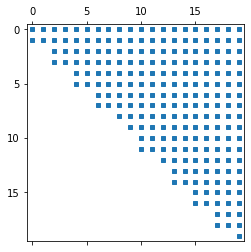

In [84]:
plt.spy(S, markersize=4, precision=1e-5)

In [82]:
np.sort(S.diagonal())

array([-3.71475153, -3.40007184, -2.9277339 , -2.56956374, -2.21060929,
       -1.83897617, -1.45481457, -0.78509172, -0.48419506, -0.28234571,
       -0.26204061, -0.06815219,  0.74047291,  1.12031843,  1.64615938,
        2.30086447,  2.340893  ,  2.38770314,  2.87754981,  3.61557833])

In [81]:
np.linalg.eigvals(A)

array([ 3.00164073+2.56991676j,  3.00164073-2.56991676j,
       -0.0223094 +4.16909611j, -0.0223094 -4.16909611j,
       -3.55741168+2.07993198j, -3.55741168-2.07993198j,
        2.87754981+0.j        ,  1.97351193+0.748818j  ,
        1.97351193-0.748818j  ,  1.73060571+1.27280726j,
        1.73060571-1.27280726j, -2.20426995+2.36686477j,
       -2.20426995-2.36686477j, -0.38327039+2.65812815j,
       -0.38327039-2.65812815j, -0.1650964 +1.8637811j ,
       -0.1650964 -1.8637811j , -2.9277339 +0.j        ,
       -2.21060929+0.j        , -1.45481457+0.j        ])

In [85]:
S[:2, :2]

array([[-0.78509172,  3.97533741],
       [-4.51866026,  0.74047291]])

In [86]:
np.linalg.eigvals(S[:2, :2])

array([-0.0223094+4.16909611j, -0.0223094-4.16909611j])